In [2]:
import numpy as np 
import pandas as pd
import os

In [168]:
movie = pd.read_csv("C:\\Users\\PRANAY KUMAR\\Downloads\\movie_data\\movies.csv")
rating = d = pd.read_csv("C:\\Users\\PRANAY KUMAR\\Downloads\\movie_data\\ratings.csv")
link = pd.read_csv("C:\\Users\\PRANAY KUMAR\\Downloads\\movie_data\\links.csv")

In [26]:
movie.shape

(9742, 3)

In [27]:
rating.shape

(100836, 4)

In [252]:
link.shape

(9742, 3)

In [28]:
unique_user_ids_count = rating['userId'].nunique()

print(f"The number of unique userIds in the ratings.csv file is: {unique_user_ids_count}")

The number of unique userIds in the ratings.csv file is: 610


In [47]:
rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [82]:
# Merge ratings with movie titles using movieId as the common column
merged_data = pd.merge(rating, movie, on='movieId')

# Get the count of ratings per movie
rating_counts = merged_data['title'].value_counts()

# Find the movie with the maximum number of ratings
max_rated_movie = rating_counts.idxmax()

print(f"The movie that received the maximum number of user ratings is: {max_rated_movie}")

The movie that received the maximum number of user ratings is: Forrest Gump (1994)


In [83]:
max_rated_movie

'Forrest Gump (1994)'

In [88]:
tags_data = pd.read_csv("C:\\Users\\PRANAY KUMAR\\Downloads\\movie_data\\tags.csv")


In [90]:
final_merged_data = pd.merge(merged_data, tags_data, on='movieId', how='inner')


In [86]:
merged_data


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [91]:
final_merged_data

,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
4,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...
233208,599,176419,3.5,1516604655,Mother! (2017),Drama|Horror|Mystery|Thriller,567,uncomfortable,1525287588
233209,599,176419,3.5,1516604655,Mother! (2017),Drama|Horror|Mystery|Thriller,567,unsettling,1525287586
233210,594,7023,4.5,1108972356,"Wedding Banquet, The (Xi yan) (1993)",Comedy|Drama|Romance,474,In Netflix queue,1137179697
233211,606,6107,4.0,1171324428,Night of the Shooting Stars (Notte di San Lore...,Drama|War,606,World War II,1178473747


In [92]:
final_merged_data.nunique()

userId_x         610
movieId         1554
rating            10
timestamp_x    42210
title           1554
genres           370
userId_y          56
tag             1584
timestamp_y     3392
dtype: int64

In [99]:
# Filter tags for the movie "Matrix, The (1999)"
matrix_tags = final_merged_data[final_merged_data['title'] == 'Matrix, The (1999)']['tag']

# Display unique tags for the movie
unique_tags = matrix_tags.unique()
print("Tags submitted by users for 'Matrix, The (1999)':")
for tag in unique_tags:
    print(tag)


Tags submitted by users for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


In [106]:
# Filter ratings for the movie "Terminator 2: Judgment Day (1991)"
movie_title = "Terminator 2: Judgment Day (1991)"
filtered_ratings = final_merged_data[final_merged_data['title'] == movie_title]

# Calculate the average rating for the movie
average_rating = filtered_ratings['rating'].mean()

print(f"The average user rating for '{movie_title}' is: {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


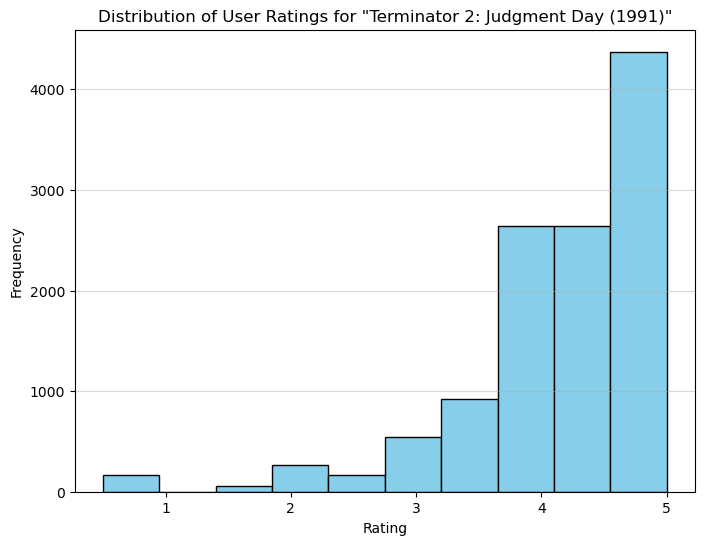

In [107]:
import matplotlib.pyplot as plt

# Assuming 'ratings_data' contains movie ratings with columns: 'movieTitle' and 'rating'

# Filter ratings for the movie "Fight Club (1999)"
movie_title1 = "Fight Club (1999)"
filtering_ratings = final_merged_data[final_merged_data['title'] == movie_title1]

# Create a histogram of user ratings for the movie
plt.figure(figsize=(8, 6))
plt.hist(filtering_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title(f'Distribution of User Ratings for "{movie_title}"')
plt.grid(axis='y', alpha=0.5)
plt.show()


In [111]:
import pandas as pd

# Assuming 'ratings' DataFrame contains columns: 'movieId' and 'rating'

# Group ratings by movieId and calculate count and mean of ratings
grouped_ratings = final_merged_data.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']

# Display the resulting DataFrame with count and mean ratings per movieId
print(grouped_ratings)


      movieId  rating_count  rating_mean
0           1           645     3.920930
1           2           440     3.431818
2           3           104     3.259615
3           5            98     3.071429
4           7            54     3.185185
...       ...           ...          ...
1549   183611             3     4.000000
1550   184471            12     2.500000
1551   187593            36     3.875000
1552   187595            10     3.900000
1553   193565             4     3.500000

[1554 rows x 3 columns]


In [112]:
final_merged_data.columns

Index(['userId_x', 'movieId', 'rating', 'timestamp_x', 'title', 'genres',
       'userId_y', 'tag', 'timestamp_y'],
      dtype='object')

In [208]:
merg_data = pd.merge(movie, grouped_ratings, on='movieId', how='inner')
mer_data = pd.merge(merg_data, link, on='movieId')


In [217]:
mer_data

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615,113228,15602.0
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429,113041,11862.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror,3,4.000000,2704998,445571.0
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy,12,2.500000,1365519,338970.0
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi,36,3.875000,5463162,383498.0
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,10,3.900000,3778644,348350.0


In [218]:
# Assuming 'merged_data' DataFrame is obtained from the merge operation

# Filter movies with more than 50 user ratings
fil_movies = mer_data[mer_data['rating_count'] > 50]

# Display the resulting DataFrame
print(fil_movies)


      movieId                               title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           5  Father of the Bride Part II (1995)   
4           7                      Sabrina (1995)   
...       ...                                 ...   
1525   148626               Big Short, The (2015)   
1536   164179                      Arrival (2016)   
1539   168248       John Wick: Chapter Two (2017)   
1540   168252                        Logan (2017)   
1544   176371            Blade Runner 2049 (2017)   

                                           genres  rating_count  rating_mean  \
0     Adventure|Animation|Children|Comedy|Fantasy           645     3.920930   
1                      Adventure|Children|Fantasy           440     3.431818   
2                                  Comedy|Romance           104     3.259615   
3                                          

In [219]:
d = fil_movies["rating_count"]<50

In [220]:
d.value_counts()

False    480
Name: rating_count, dtype: int64

In [221]:
most_popular_movie = fil_movies.loc[fil_movies['rating_count'] > 50].nlargest(1, 'rating_mean')
print("The most popular movie based on average user ratings is:")
print(most_popular_movie[['movieId', 'title', 'rating_mean']])


The most popular movie based on average user ratings is:
    movieId                             title  rating_mean
83      318  Shawshank Redemption, The (1994)     4.429022


In [222]:
# Assuming 'filtered_movies' DataFrame contains movie details and user ratings

# Sort movies by the number of user ratings in descending order
top_5_popular_movies = fil_movies.nlargest(5, 'rating_count')

# Display the top 5 popular movies based on the number of user ratings
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_popular_movies[['movieId', 'title', 'rating_count']])


Top 5 popular movies based on the number of user ratings:
     movieId                                              title  rating_count
77       296                                Pulp Fiction (1994)         55567
637     2959                                  Fight Club (1999)         11772
65       260          Star Wars: Episode IV - A New Hope (1977)          6526
76       293  Léon: The Professional (a.k.a. The Professiona...          4655
206      924                       2001: A Space Odyssey (1968)          4469


In [223]:
top_5_popular_movies

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
77,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,55567,4.197068,110912,680.0
637,2959,Fight Club (1999),Action|Crime|Drama|Thriller,11772,4.272936,137523,550.0
65,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,6526,4.231076,76759,11.0
76,293,Léon: The Professional (a.k.a. The Professiona...,Action|Crime|Drama|Thriller,4655,4.018797,110413,101.0
206,924,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,4469,3.894495,62622,62.0


In [224]:
# Assuming 'filtered_movies' DataFrame contains movie details including genres and user ratings

# Filter Sci-Fi movies
sci_fi_movies = fil_movies[fil_movies['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by the number of user ratings in descending order
sorted_sci_fi_movies = sci_fi_movies.nlargest(len(sci_fi_movies), 'rating_count')

# Identify the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]  # Index 2 for the third movie

# Display the third most popular Sci-Fi movie based on the number of user ratings
print("The third most popular Sci-Fi movie based on the number of user ratings is:")
print(third_most_popular_sci_fi_movie[['movieId', 'title', 'rating_count']])


The third most popular Sci-Fi movie based on the number of user ratings is:
movieId                                                 7361
title           Eternal Sunshine of the Spotless Mind (2004)
rating_count                                            4454
Name: 1140, dtype: object


In [225]:
fil_movies

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,645,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,440,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,104,3.259615,113228,15602.0
3,5,Father of the Bride Part II (1995),Comedy,98,3.071429,113041,11862.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
1525,148626,"Big Short, The (2015)",Drama,78,3.961538,1596363,318846.0
1536,164179,Arrival (2016),Sci-Fi,182,3.980769,2543164,329865.0
1539,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,56,4.142857,4425200,324552.0
1540,168252,Logan (2017),Action|Sci-Fi,125,4.280000,3315342,263115.0


In [184]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    # Send GET request to the IMDb URL
    response = requests.get(URL, headers=request_header)
    
    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the IMDb rating element
    imdb_rating = soup.find('span', itemprop='ratingValue')
    
    return imdb_rating.text if imdb_rating else np.nan


In [228]:
# Convert IMDb ratings to numeric values
fil_movies['imdbId'] = pd.to_numeric(fil_movies['imdbId'], errors='coerce')

# Find the row with the highest IMDb rating
highest_rated_movie = fil_movies.loc[fil_movies['imdbId'].idxmax()]

# Extract movieId of the movie with the highest IMDb rating
highest_rated_movie_id = highest_rated_movie['movieId']

# Display the movieId of the movie with the highest IMDb rating
print(f"The movieId of the movie with the highest IMDb rating is: {highest_rated_movie_id}")


The movieId of the movie with the highest IMDb rating is: 168248


C:\Users\PRANAY KUMAR\AppData\Local\Temp\ipykernel_23560\2469541242.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fil_movies['imdbId'] = pd.to_numeric(fil_movies['imdbId'], errors='coerce')


In [251]:
highest_rated_movie

movieId                                168248
title           John Wick: Chapter Two (2017)
genres                  Action|Crime|Thriller
rating_count                               56
rating_mean                          4.142857
imdbId                                4425200
tmdbId                               324552.0
Name: 1539, dtype: object

In [243]:

# Filter Sci-Fi movies
sci_fi_movies = fil_movies[fil_movies['genres'].str.contains('Sci-Fi', case=False)]

# Convert IMDb ratings to numeric values
sci_fi_movies['imdbId'] = pd.to_numeric(sci_fi_movies['imdbId'], errors='coerce')

# Find the row with the highest IMDb rating among Sci-Fi movies
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax()]

# Extract movieId of the highest-rated Sci-Fi movie
highest_rated_sci_fi_movie_id = highest_rated_sci_fi_movie['movieId']

# Display the movieId of the highest-rated Sci-Fi movie
print(f"The movieId of the highest-rated Sci-Fi movie is: {highest_rated_sci_fi_movie_id}")


The movieId of the highest-rated Sci-Fi movie is: 122912


C:\Users\PRANAY KUMAR\AppData\Local\Temp\ipykernel_23560\2967976433.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sci_fi_movies['imdbId'] = pd.to_numeric(sci_fi_movies['imdbId'], errors='coerce')


In [244]:
highest_rated_sci_fi_movie_id

122912

In [247]:
specific_movie_id = 122912  # Replace with the movieId you want to check

is_present = specific_movie_id in sci_fi_movies['movieId'].values


In [248]:
is_present

True